In [2]:
import pandas as pd
import numpy as np

In [1]:
file=r'/Users/lalitsachan/Dropbox/PDS V3/Data/bank-full.csv'

In [3]:
bd=pd.read_csv(file,delimiter=';')

In [7]:
bd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bd.sample(5)

In [ ]:
bd.describe()

In [ ]:
list(zip(bd.columns,bd.nunique(dropna=False),bd.dtypes))

In [ ]:
bd['age'].describe()

In [ ]:
bd['age'].nunique()

In [ ]:
# you can apply function describe on categorical/object data also 

In [ ]:
bd['job'].describe()

In [ ]:
bd.mean()

In [ ]:
bd['age'].mean(),bd['age'].median()

|Function	|Description|
|-----------|-----------|
|count	|Number of non-null observations|
|sum	|Sum of values|
|mean	|Mean of values|
|mad	|Mean absolute deviation|
|median	|Arithmetic median of values|
|min	|Minimum|
|max	|Maximum|
|mode	|Mode|
|abs	|Absolute Value|
|prod	|Product of values|
|std	|Unbiased standard deviation|
|var	|Unbiased variance|
|sem	|Unbiased standard error of the mean|
|skew	|Unbiased skewness (3rd moment)|
|kurt	|Unbiased kurtosis (4th moment)|
|quantile	|Sample quantile (value at %)|
|cumsum	|Cumulative sum|
|cumprod	|Cumulative product|
|cummax	|Cumulative maximum|
|cummin	|Cumulative minimum|

In [ ]:
# create some functional examples for cumsum and cummax 
# vidyut


In [ ]:
k=bd['job'].value_counts()

In [ ]:
k

In [ ]:
type(k)

In [ ]:
k.index

In [ ]:
k.values

In [ ]:
k.index[0],k.index[-1]

In [ ]:
k.index[k.values>1500]

In [ ]:
k.index[k>1500]

In [ ]:
bd['default'].value_counts()

In [ ]:
bd['housing'].value_counts()

In [ ]:
bd['job'].value_counts()

In [ ]:
pd.crosstab(bd['housing'],bd['job'])

In [ ]:
pd.crosstab(bd['default'],bd['housing'])

In [ ]:
pd.crosstab(bd['default'],bd['housing'],margins=True)

# by default value_counts and crosstab ignore missing values 
# you can change that behavior dropna=False

In [ ]:
d=pd.DataFrame({'a': [1,1,1,1,2,2,2,np.nan,np.nan,4,4]})

In [ ]:
d['a'].value_counts(dropna=False)

In [ ]:
bd.select_dtypes(['object'])

In [ ]:
bd.select_dtypes(exclude=['object'])

In [ ]:
cat_var=bd.select_dtypes(['object']).columns

In [ ]:
for col in cat_var:
    print('column name:',col)
    print(bd[col].value_counts())
    print('~~~~~')

In [ ]:
bd.groupby(['job']).mean()

In [ ]:
bd.groupby(['housing','loan']).mean()

In [ ]:
bd.groupby(['housing','loan'])['balance','age'].mean()

In [ ]:
bd.aggregate({'housing':'count','balance':'mean','age':'nunique'})

In [ ]:
pd.pivot_table(bd,
               values=['age'],
               index=['loan'],
               columns=['housing'],
               aggfunc='mean')

# Visual Summary with seaborn

In [6]:
import seaborn as sns
%matplotlib inline 
# it makes the plots appear in the notebook itself

## Single Numeric Column

In [ ]:
sns.distplot(bd['balance'],kde=True,norm_hist=False,bins=100,hist=False)


In [ ]:
bd['balance'].describe()

In [ ]:
myplot=sns.distplot(bd['balance'],kde=True,norm_hist=False,bins=100,hist=False)

myimg=myplot.get_figure()

In [ ]:
myimg.savefig('output.png')

In [ ]:
sns.kdeplot(bd['balance'],shade=True)
sns.kdeplot(bd['age'],shade=True)

# it makes sense to make multiple density plots in one figure 
# when the variables or the data takes values in similar ranges

In [ ]:
sns.boxplot(y='age',data=bd)

In [ ]:
sns.kdeplot(bd['age'])

In [ ]:
sns.violinplot(y='age',data=bd)

## numeric-numeric

In [ ]:
sns.jointplot(x="age", y="balance", data=bd)
# scatter plot , dot plots

In [ ]:
sns.jointplot(x="age", y="balance", data=bd.iloc[:500,:],
              kind="hex",size=10,color="g")
# used subset of data to see a more clear plot

In [ ]:
sns.lmplot('age', 'balance', 
           data=bd.iloc[1:100,:],palette="Set1",
           fit_reg=True,order=2)

In [ ]:
sns.lmplot('age', 'balance', 
           data=bd.iloc[1:500,:],palette="Set1",
           hue='housing',
           col='default',
           row='loan',
           fit_reg=False)

## Categorical

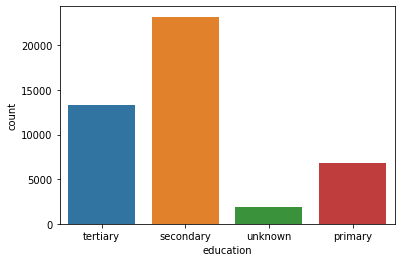

In [7]:
sns.countplot(x="education", data=bd)

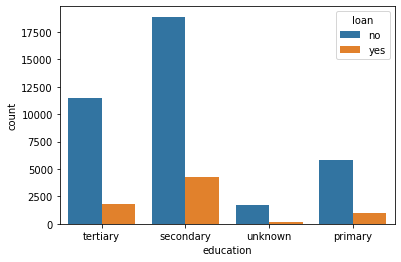

In [9]:
sns.countplot(x="education", data=bd,hue='loan')

# explore sns.barplot
# check if countplot also supports , row and column arguments 
# like lmplot

# Numeric Categorical 

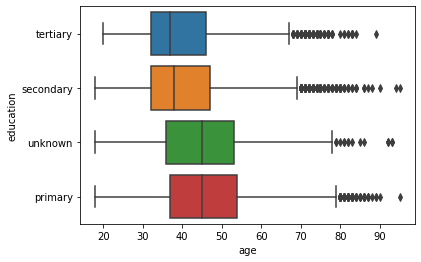

In [12]:
sns.boxplot(x='age',y='education',data=bd)

# Heatmaps

In [13]:
bd.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


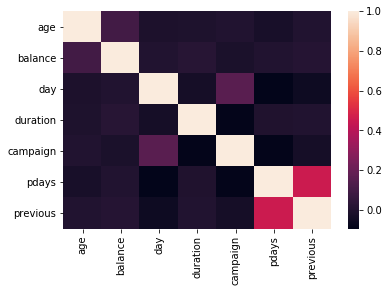

In [14]:
sns.heatmap(bd.corr())